In [1]:
import os
import pandas as pd

base_dir = "../Data"
base_csv_path = os.path.join(base_dir, 'm1_imputed.csv')
assert os.path.exists(base_csv_path), f"{base_csv_path} does not exist"

df = pd.read_csv(base_csv_path)

In [2]:
#Print number of missing values in wl_tme
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

#Print number of values in wl_time
print(f'Number of values in wl_time: {df["wl_time"].count()}')

wl_median = df['wl_time'].median()

#Print median for wl_time
print(f'Median for wl_time: {wl_median}')

#Code wl_time to 0 if wl_time is is less than the median else 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < wl_median else 1)

#Print percentage of 0 and 1 in wl_time
print(f'Percentage of 0 and 1 in wl_time: \n{df["wl_time"].value_counts(normalize=True) * 100}')

#Print number of missing values in wl_time
print(f'Number of missing values in wl_time: {df["wl_time"].isnull().sum()}')

Number of missing values in wl_time: 0
Number of values in wl_time: 65067
Median for wl_time: 88.0
Percentage of 0 and 1 in wl_time: 
1    50.148309
0    49.851691
Name: wl_time, dtype: float64
Number of missing values in wl_time: 0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Example dataset and labels
X = df.drop('wl_time', axis=1)
y = df['wl_time']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Obtain predicted probabilities on the testing set
y_pred = model.predict_proba(X_test_scaled)[:, 1]

# Calculate AUROC
auroc = roc_auc_score(y_test, y_pred)

print("AUROC:", auroc)

AUROC: 0.7646397407386544


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

X = df.drop(['wl_time'], axis=1)
y = df['wl_time']

one_hot_cols = [col for col in df.columns if df[col].nunique() == 2]
columns_to_scale = [col for col in X.columns if col not in one_hot_cols]

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [5]:
from sklearn.model_selection import cross_val_predict

log = LogisticRegression(max_iter=1000)
f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")

F1 score pre feature selection: 0.6892178121040025
F1 macro score pre feature selection: 0.6884008574176745


In [6]:
import numpy as     np

log.fit(X, y)

# Get the coefficients (log odds) of the logistic regression model
coefficients = log.coef_[0]

# Calculate the odds ratio for each feature
odds_ratios = np.exp(coefficients)

# Display the odds ratio for each feature
for feature, odds_ratio in zip(X.columns, odds_ratios):
    print(f"Feature: {feature}, Odds Ratio: {odds_ratio}")

f1_scores = cross_val_score(log, X, y, cv=5, scoring='f1').mean()
print(f"F1 score pre feature selection: {f1_scores}")

f1_macro_scores = cross_val_score(log, X, y, cv=5, scoring='f1_macro').mean()
print(f"F1 macro score pre feature selection: {f1_macro_scores}")


Feature: wgt_kg_tcr, Odds Ratio: 1.560878498053262
Feature: hgt_cm_tcr, Odds Ratio: 1.0936080505354628
Feature: most_rcnt_creat, Odds Ratio: 0.9453418857694968
Feature: tot_serum_album, Odds Ratio: 1.0499989528238582
Feature: hemo_co_tcr, Odds Ratio: 1.0156137443090383
Feature: init_age, Odds Ratio: 0.9431536765105721
Feature: init_hgt_cm_calc, Odds Ratio: 0.9435972179945781
Feature: init_wgt_kg_calc, Odds Ratio: 0.938293278229884
Feature: wgt_kg_tcr_missing, Odds Ratio: 1.0
Feature: hgt_cm_tcr_missing, Odds Ratio: 1.0
Feature: most_rcnt_creat_missing, Odds Ratio: 1.0026590057346458
Feature: tot_serum_album_missing, Odds Ratio: 0.9094708875237408
Feature: hemo_co_tcr_missing, Odds Ratio: 0.9706272432510357
Feature: init_age_missing, Odds Ratio: 1.0
Feature: init_hgt_cm_calc_missing, Odds Ratio: 1.0
Feature: init_wgt_kg_calc_missing, Odds Ratio: 1.0
Feature: thoracic_dgn_1.0, Odds Ratio: 1.0444553337270426
Feature: thoracic_dgn_2.0, Odds Ratio: 1.1747839057450578
Feature: thoracic_dgn_3

<Axes: >

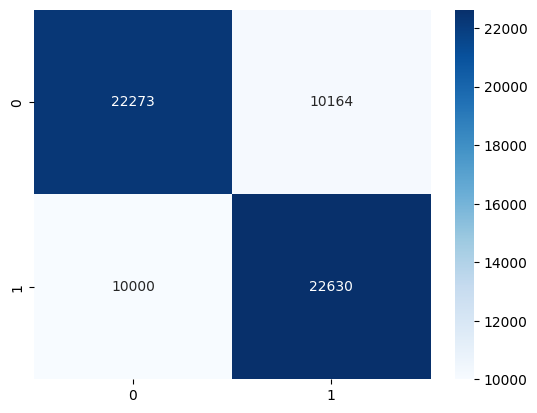

In [7]:
import seaborn as sns

y_pred = cross_val_predict(log, X, y, cv=5)
sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap='Blues', fmt='g')

In [8]:
import seaborn as sns

#df.corr()
#sns.heatmap(df.corr(), annot=True)